加载数据集

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

运行k-均值

In [2]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

对数据应用k-均值。因为有10个（0～9）不同的数字，我们让算法寻找10个不同的簇：

In [3]:
import numpy as np
compactness, clusters, centers = cv2.kmeans(digits.data.astype(np.float32), 10, None, criteria, 10, flags)

类似于表示不同RGB颜色的N×3矩阵，这次，centers数组由N×8×8个中心图像组成，N是聚类数。因此，如果我们想要绘制出中心，就必须把centers矩阵重新调整为8×8的图像：

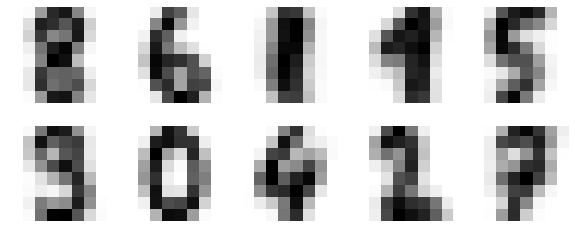

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.savefig('digits.png')

值得注意的是，k-均值不仅能够把数字图像划分为任意10个随机簇，还能够划分为0~9的数字！为了找出哪些图像分组成了哪些簇，我们需要生成一个labels向量，正如我们在监督学习问题中所学习的：

In [5]:
from scipy.stats import mode

labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

使用scikit-learn的accuracy_score评估指标计算算法的性能：

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7846410684474123

通过观察混淆矩阵，我们可以更深入地了解哪里出了问题，以及是如何出错的。混淆矩阵是一个二维矩阵C，其中每个元素Ci, j等于已知在第i组（或簇）中，但是却预测为在第j组中的观察数。因此，矩阵对角线上的所有元素表示已经正确分类的数据点（即已知在第i组，预测也在第i组）。非对角线上的元素表示错误分类的数据点。

在scikit-learn中，创建一个混淆矩阵基本上只需一行代码：

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, labels)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 154,  25,   0,   0,   1,   2,   0,   0,   0],
       [  1,   3, 147,  11,   0,   0,   0,   3,  12,   0],
       [  0,   1,   2, 159,   0,   2,   0,   9,  10,   0],
       [  0,  12,   0,   0, 162,   0,   0,   5,   2,   0],
       [  0,   0,   0,  40,   2, 138,   2,   0,   0,   0],
       [  1,   2,   0,   0,   0,   0, 177,   0,   1,   0],
       [  0,  14,   0,   0,   0,   0,   0, 164,   1,   0],
       [  0,  23,   3,   8,   0,   5,   1,   2, 132,   0],
       [  0,  21,   0, 145,   0,   5,   0,   8,   1,   0]], dtype=int64)

混淆矩阵告诉我们k-均值对前9个类中数据点的分类任务完成得很好；但是，却把所有的9和3弄混了。尽管如此，这个结果还是相当可靠的，因为算法不需要训练的目标标签。